### the purpose of this is to conduct ICA for each group (cTBS or sham) of resting-state MRI data

In [5]:
# import modules to use
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

In [6]:
import numpy as np
import nibabel as nib
import pandas as pd
import os
from pathlib import Path

from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from scipy.stats import pearsonr

In [7]:
# Load the Excel file into a DataFrame
SubInfo = pd.read_excel('/Users/liuq13/NODEAP_scripts/ProcessedData/SubConds.xlsx')

# Filter subjects based on the 'Include' column
Subs = SubInfo[SubInfo['Include'] == 1]['SubID']

# Initialize an empty list to store TMS types
TMS_types = []

# Loop through each row and assign TMS types based on 'StimOrder'
for i, row in SubInfo.iterrows():
    tmp_order = row['StimOrder']
    
    # Assign TMS types based on the 'StimOrder' value
    if tmp_order == 123:
        TMS_types.append(['N', 'C', 'S', 'S', 'C', 'S', 'S'])
    elif tmp_order == 132:
        TMS_types.append(['N', 'C', 'S', 'S', 'S', 'S', 'C'])
    elif tmp_order == 213:
        TMS_types.append(['N', 'S', 'C', 'C', 'S', 'S', 'S'])
    elif tmp_order == 231:
        TMS_types.append(['N', 'S', 'C', 'S', 'S', 'C', 'S'])
    elif tmp_order == 312:
        TMS_types.append(['N', 'S', 'S', 'C', 'S', 'S', 'C'])
    elif tmp_order == 321:
        TMS_types.append(['N', 'S', 'S', 'S', 'C', 'C', 'S'])

In [8]:
# Assuming TMS_types is a list of lists where each inner list corresponds to a subject
# Example: TMS_types[j] contains ['N', 'C', 'S', 'S', 'C', 'S', 'S'] for subject j

# Base folder where the NIfTI files are stored
base_nifti_folder = '/Volumes/X9Pro/NODEAP/MRI'
session_folders = ['D0', 'S1D1', 'S1D2', 'S2D1', 'S2D2', 'S3D1', 'S3D2']
nifti_paths_by_tms_type = {'N': [], 'C': [], 'S': []}

# Loop through each subject and their TMS types
for i, subject_id in enumerate(Subs):
    tms_types = TMS_types[i]  
    for j, session in enumerate(session_folders):
        nifti_folder = os.path.join(base_nifti_folder, subject_id, 'nifti', 'functional', session)
        if os.path.exists(nifti_folder):
            files_in_folder = os.listdir(nifti_folder)
            nifti_files = [f for f in files_in_folder if f.startswith('s6w2') and f.endswith('.nii')]
            
            if nifti_files:
                # Assume we're interested in the first matching file if multiple are found
                nifti_file = nifti_files[0]
                nifti_file_path = os.path.join(nifti_folder, nifti_file)
                
                # Assign the NIfTI file path to the corresponding TMS type
                tms_type = tms_types[j]  # Index based on the session number
                nifti_paths_by_tms_type[tms_type].append(nifti_file_path)
            else:
                print(f"No NIfTI file starting with 's6w2' found in {nifti_folder}")
        else:
            print(f"Session folder not found: {nifti_folder}")

# Now, nifti_paths_by_tms_type['N'], nifti_paths_by_tms_type['C'], and nifti_paths_by_tms_type['S']
# contain lists of file paths for the N, C, and S TMS types respectively, across all subjects.

Session folder not found: /Volumes/X9Pro/NODEAP/MRI/NODEAP_30/nifti/functional/S3D2
Session folder not found: /Volumes/X9Pro/NODEAP/MRI/NODEAP_83/nifti/functional/S3D1
Session folder not found: /Volumes/X9Pro/NODEAP/MRI/NODEAP_87/nifti/functional/D0
Session folder not found: /Volumes/X9Pro/NODEAP/MRI/NODEAP_88/nifti/functional/D0


In [9]:
canica = CanICA(
    n_components=20,
    smoothing_fwhm=None,  # Set to None as data is already smoothed
    memory="nilearn_cache",
    memory_level=2,
    verbose=1,
    mask_strategy="whole-brain-template", # how the mask is computed
    random_state=0,
    standardize="zscore_sample",
    n_jobs=4,
)

In [ ]:
# where to save the output
output_dir = Path.cwd() / "NODEAP_results_canica"
output_dir.mkdir(exist_ok=True, parents=True)

In [10]:
for tms_type in ['C', 'S', 'N']:
    # Get the list of NIfTI file paths for the current TMS type
    func_filenames = nifti_paths_by_tms_type[tms_type]
    canica.fit(func_filenames)
    canica_components_img = canica.components_img_   # 4D nifti image
    output_filename = f"canica_resting_state_{tms_type}.nii.gz"  # Save the components
    output_filepath = output_dir / output_filename
    canica_components_img.to_filename(output_filepath)  # Save the NIfTI image to the output directory
    print(f"Output for TMS type '{tms_type}' saved to: {output_filepath}")

[MultiNiftiMasker.fit] Loading data from [/Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S3D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S2D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S3D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/S1D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/S3D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_09/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_09/nifti/functional/S3D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_10/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_10/nifti/functional/S3D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_12/nifti/functional/S1D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_12/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_13/nifti/func

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:616: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x122c42020>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:813: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x122c42020>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S2D2/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/S1D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S3D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/S3D2/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S2D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_09/nifti/functional/S3D1/s6w2fvol_4d.nii')
[Mu

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/liuq13/nilearn_env/lib

Output for TMS type 'C' saved to: /Users/liuq13/NODEAP_scripts/Scripts_python/NODEAP_results/plot_compare_decomposition/canica_resting_state_C.nii.gz
[MultiNiftiMasker.fit] Loading data from [/Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S1D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S1D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S2D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/S3D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S1D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S1D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S2D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S3D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/S1D2/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/S2D1/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functi

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:616: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x122c42020>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_to_img...
resample_to_img(<nibabel.nifti1.Nifti1Image object at 0x124aa3c80>, <nibabel.nifti1.Nifti1Image object at 0x124cb28d0>)
__________________________________________________resample_to_img - 0.4s, 0.0min
__________________________________________________________unknown - 3.1s, 0.1min
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:813: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x122c42020>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/S3D2/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_09/nifti/functional/S2D2/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_10/nifti/functional/S3D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_13/nifti/functional/S3D1/s6w2fvol_4d.nii')
[Mu

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_17/nifti/functional/S2D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_30/nifti/functional/S2D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_35/nifti/functional/S2D2/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_39/nifti/functional/S3D1/s6w2fvol_4d.nii')
[Mu

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/liuq13/nilearn_env/lib

________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[-0., ..., -0.],
       ...,
       [-0., ..., -0.]], dtype=float32), <nibabel.nifti1.Nifti1Image object at 0x124cb27b0>)
___________________________________________________________unmask - 0.1s, 0.0min
Output for TMS type 'S' saved to: /Users/liuq13/NODEAP_scripts/Scripts_python/NODEAP_results/plot_compare_decomposition/canica_resting_state_S.nii.gz
[MultiNiftiMasker.fit] Loading data from [/Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/D0/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_07/nifti/functional/D0/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_08/nifti/functional/D0/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_09/nifti/functional/D0/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_10/nifti/functional/D0/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/MRI/NODEAP_12/nifti/functional/D0/s6w2fvol_4d.nii,
 /Volumes/X9Pro/NODEAP/M

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:616: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x122c42020>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_to_img...
resample_to_img(<nibabel.nifti1.Nifti1Image object at 0x124aa3c80>, <nibabel.nifti1.Nifti1Image object at 0x12564d940>)
__________________________________________________resample_to_img - 0.4s, 0.0min
__________________________________________________________unknown - 2.6s, 0.0min
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_76/nifti/functional/S1D1/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 3.6s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._fast_svd...
_fast

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/joblib/memory.py:813: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x122c42020>, mask_type='whole-brain'), ignore list will not work.
  argument_dict = filter_args(self.func, self.ignore,



[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_76/nifti/functional/S3D2/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 3.7s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._fast_svd...
_fast_svd(array([[-1.614746, ..., -0.423624],
       ...,
       [-1.326024, ...,  0.380062]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x10BA9FA40)
_________________________________________________________fast_svd - 0.7s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.nifti_masker._filter_and_mask...
_filter_and_mask('/Volumes/X9Pro/NODEAP/MRI/NODEAP_77/nifti/functional/S3D1/s6w2fvol_4d.nii', <nibabel

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_06/nifti/functional/D0/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 1.8s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._fast_svd...
_fast_svd(array([[ 1.487613, ..., -0.43597 ],
       ...,
       [ 1.452979, ..., -1.530392]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x10464FA40)
_________________________________________________________fast_svd - 0.7s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.nifti_masker._filter_and_mask...
_filter_and_mask('/Volumes/X9Pro/NODEAP/MRI/NODEAP_10/nifti/functional/D0/s6w2fvol_4d.nii', <nibabel.nif

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.7s finished


________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0.      , ..., -0.004676],
       ...,
       [-0.      , ..., -0.      ]], dtype=float32), 
<nibabel.nifti1.Nifti1Image object at 0x124dd5fd0>)
___________________________________________________________unmask - 0.1s, 0.0min
Output for TMS type 'N' saved to: /Users/liuq13/NODEAP_scripts/Scripts_python/NODEAP_results/plot_compare_decomposition/canica_resting_state_N.nii.gz


Plotting components for TMS type: C


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


Plotting components for TMS type: S


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


Plotting components for TMS type: N


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


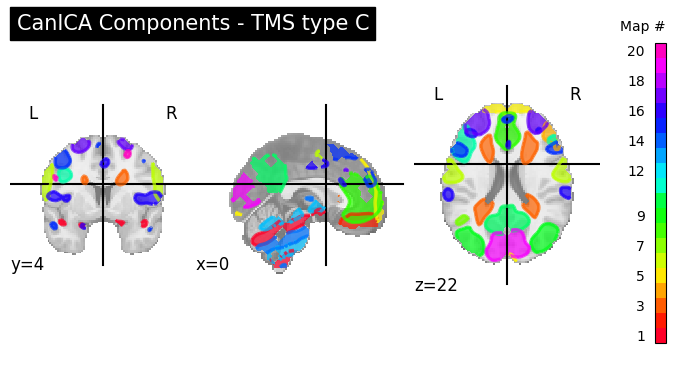

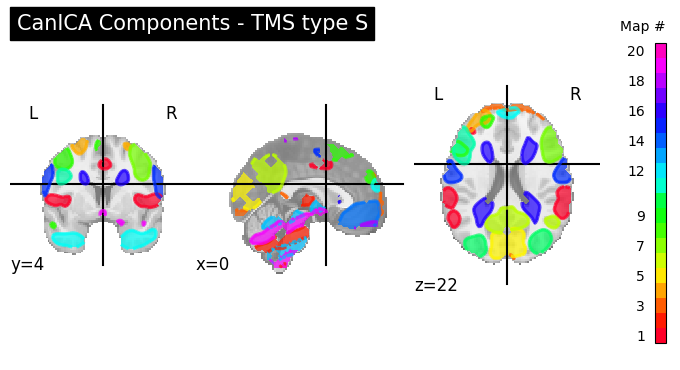

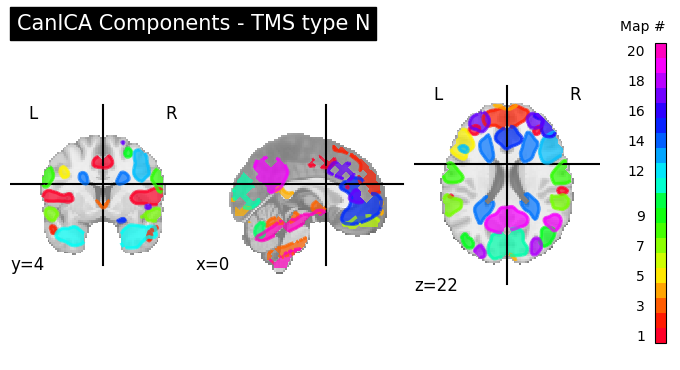

In [11]:
# plot all components of each TMS type
for tms_type in ['C', 'S', 'N']:
    nifti_file = output_dir / f"canica_resting_state_{tms_type}.nii.gz"
    canica_components_img = nib.load(nifti_file)
    
    print(f"Plotting components for TMS type: {tms_type}")
    plot_prob_atlas(canica_components_img, 
                    colorbar=True,
                    title=f"CanICA Components - TMS type {tms_type}")

plt.show()

In [8]:
# functions to realign components of one based on another one
def correlate_components(comp1, comp2):
    # Compute correlation between two 3D NIfTI images
    data1 = comp1.get_fdata().ravel()
    data2 = comp2.get_fdata().ravel()
    return pearsonr(data1, data2)[0]

def match_components_across_tms(components_list1, components_list2):
    # Compute correlation matrix between two sets of components
    n = len(components_list1)
    corr_matrix = np.zeros((n, n))
    
    for i, comp1 in enumerate(components_list1):
        for j, comp2 in enumerate(components_list2):
            corr_matrix[i, j] = correlate_components(comp1, comp2)
    
    # Find best matches (e.g., using Hungarian algorithm or manual inspection)
    matched_indices = np.argmax(corr_matrix, axis=1)
    return matched_indices


In [9]:
# Dictionary to store components for each TMS type
components_by_tms_type = {}

# Loop over TMS types ('C', 'S', 'N') and load the saved NIfTI files
for tms_type in ['C', 'S', 'N']:
    nifti_file = output_dir / f"canica_resting_state_{tms_type}.nii.gz"
    canica_components_img = nib.load(nifti_file)
    
    # Extract individual components from the 4D NIfTI image
    n_components = canica_components_img.shape[-1]  # Number of components
    components_by_tms_type[tms_type] = [
        nib.Nifti1Image(canica_components_img.get_fdata()[..., i], 
                        affine=canica_components_img.affine)
        for i in range(n_components)
    ]

# Now components_by_tms_type['C'], components_by_tms_type['S'], and components_by_tms_type['N']
# contain lists of components for each TMS type.

In [10]:
# change where to save
output_dir = Path.cwd() / "NODEAP_results" / "realigned_components_approach1"
output_dir.mkdir(exist_ok=True, parents=True)

In [11]:
# Match components from TMS type 'C' with components from TMS type 'S'
# use S as the reference to reorder C

components_C = components_by_tms_type['C']
components_S = components_by_tms_type['S']

matched_indices_C = match_components_across_tms(components_S, components_C)
reordered_components_C = [components_C[i] for i in matched_indices_C]

components_S_4D = nib.concat_images(components_S)            # Concatenate into 4D NIfTI
components_C_4D = nib.concat_images(reordered_components_C)  # Concatenate into 4D NIfTI

# save the 4D NIfTI files
output_nifti_file_C = output_dir / 'aligned_components_C_4D.nii'
output_nifti_file_S = output_dir / 'aligned_components_S_4D.nii'
nib.save(components_C_4D, output_nifti_file_C)
nib.save(components_S_4D, output_nifti_file_S)

print(f"Saved reordered 4D components for C group as {output_nifti_file_C}")
print(f"Saved reordered 4D components for S group as {output_nifti_file_S}")

# Save each component of S group as separate 3D NIfTI files 
for i, comp_img in enumerate(nib.four_to_three(components_S_4D)):
    output_3d_file = output_dir / f'aligned_component_S_{i+1}.nii'
    nib.save(comp_img, output_3d_file)

# Similarly for C group
for i, comp_img in enumerate(nib.four_to_three(components_C_4D)):
    output_3d_file = output_dir / f'aligned_component_C_{i+1}.nii'
    nib.save(comp_img, output_3d_file)

Saved reordered 4D components for C group as /Users/liuq13/NODEAP_ICA/NODEAP_results/realigned_components_approach1/aligned_components_C_4D.nii
Saved reordered 4D components for S group as /Users/liuq13/NODEAP_ICA/NODEAP_results/realigned_components_approach1/aligned_components_S_4D.nii


/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


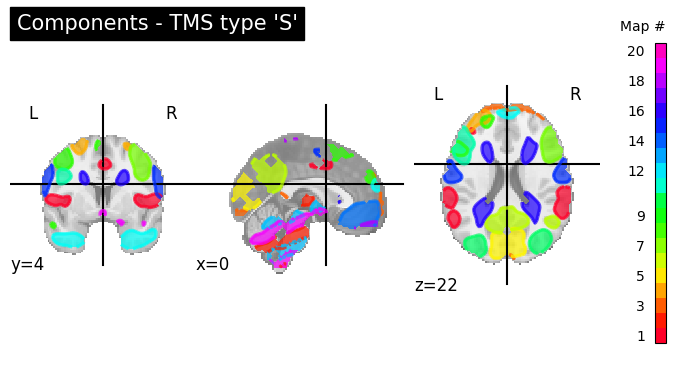

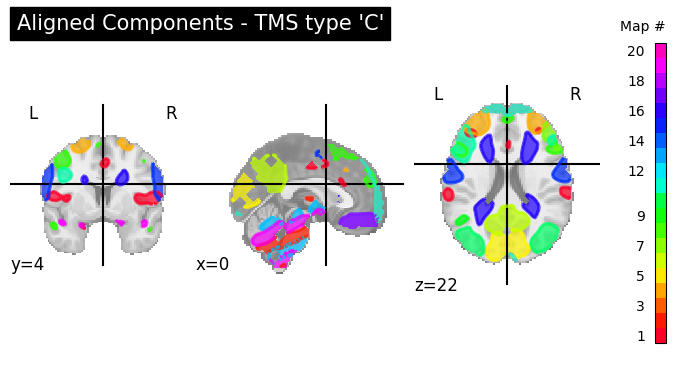

In [12]:
display_S = plot_prob_atlas(components_S_4D, colorbar=True, 
                title="Components - TMS type 'S'")
display_C = plot_prob_atlas(components_C_4D, colorbar=True, 
                title="Aligned Components - TMS type 'C'")
plt.show()

In [12]:
# plot each component separately
for tms_type in ['C', 'S']:
    nifti_file = output_dir / f"aligned_components_{tms_type}_4D.nii"
    canica_components_img = nib.load(nifti_file)
    canica_data = canica_components_img.get_fdata()
    
    n_components = canica_data.shape[-1]  # Number of components
    global_vmin = np.min(canica_data)
    global_vmax = np.max(canica_data)

    fig, axes = plt.subplots(5, 4, figsize=(30, 20)) 
    axes = axes.flatten()
    for i in range(n_components):
        # Extract the i-th component as a new NIfTI image
        component_img = nib.Nifti1Image(canica_data[..., i], 
                                        affine=canica_components_img.affine)
        
        # Plot the component in the i-th subplot (using axes[i])
        plot_stat_map(component_img, title=f"Component {i + 1}", 
                      vmin=global_vmin, vmax=global_vmax, 
                      axes=axes[i], colorbar=False)

    fig.suptitle(f"All Components - TMS type {tms_type}", fontsize=20)
    fig.savefig(output_dir / f"all_components_TMS_{tms_type}.png")
    plt.show()
    plt.close(fig)

FileNotFoundError: No such file or no access: '/Users/liuq13/NODEAP_scripts/Scripts_python/NODEAP_results/plot_compare_decomposition/aligned_components_C_4D.nii'


[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Volumes/X9Pro/NODEAP/MRI/NODEAP_53/nifti/functional/D0/s6w2fvol_4d.nii')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
__________________________________________________filter_and_mask - 4.6s, 0.1min
________________________________________________________________________________
[Memory] Calling nilearn.decomposition._base._fast_svd...
_fast_svd(array([[-0.724628, ..., -0.374686],
       ...,
       [ 0.281571, ...,  0.68951 ]], dtype=float32), 
20, random_state=RandomState(MT19937) at 0x10464FA40)
_________________________________________________________fast_svd - 0.7s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.maskers.nifti_masker._filter_and_mask...
_filter_and_mask('/Volumes/X9Pro/NODEAP/MRI/NODEAP_63/nifti/functional/D0/s6w2fvol_4d.nii', <nibabel.nif

In [23]:
# below is doing the alignment a bit differently
# both aligned with those components from Day 0 sessions (null)

# change where to save
output_dir = Path.cwd() / "NODEAP_results" / "realigned_components_approach2"
output_dir.mkdir(exist_ok=True, parents=True)

components_C = components_by_tms_type['C']
components_S = components_by_tms_type['S']
components_N = components_by_tms_type['N']

# Match components from TMS type 'C' with components from TMS type 'N'
matched_indices_C = match_components_across_tms(components_N, components_C)
reordered_components_C = [components_C[i] for i in matched_indices_C]

# Match components from TMS type 'S' with components from TMS type 'N'
matched_indices_S = match_components_across_tms(components_N, components_S)
reordered_components_S = [components_S[i] for i in matched_indices_S]

components_S_4D = nib.concat_images(reordered_components_S)  # Concatenate into 4D NIfTI
components_C_4D = nib.concat_images(reordered_components_C)  # Concatenate into 4D NIfTI
components_N_4D = nib.concat_images(components_N)  # Concatenate into 4D NIfTI

output_nifti_file_C = output_dir / 'aligned_components_C_with_N_4D.nii'
output_nifti_file_S = output_dir / 'aligned_components_S_with_N_4D.nii'
nib.save(components_C_4D, output_nifti_file_C)
nib.save(components_S_4D, output_nifti_file_S)

# Save each component of S group as separate 3D NIfTI files 
for i, comp_img in enumerate(nib.four_to_three(components_S_4D)):
    output_3d_file = output_dir / f'aligned_component_S_{i+1}.nii'
    nib.save(comp_img, output_3d_file)

# Similarly for C group
for i, comp_img in enumerate(nib.four_to_three(components_C_4D)):
    output_3d_file = output_dir / f'aligned_component_C_{i+1}.nii'
    nib.save(comp_img, output_3d_file)

# for N group
for i, comp_img in enumerate(nib.four_to_three(components_N_4D)):
    output_3d_file = output_dir / f'component_N_{i+1}.nii'
    nib.save(comp_img, output_3d_file)

/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(
/Users/liuq13/nilearn_env/lib/python3.12/site-packages/numpy/ma/core.py:2881: UserWarning: Warning: converting a masked element t

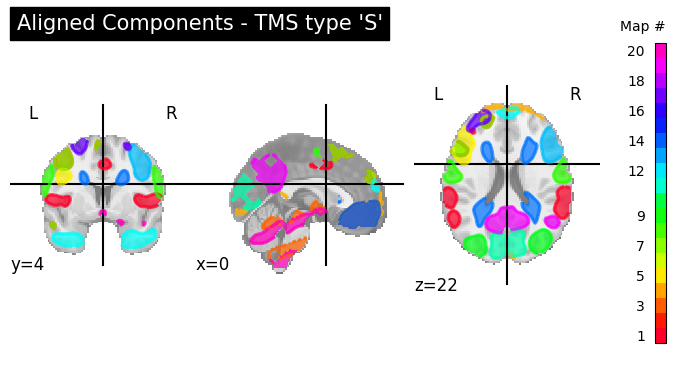

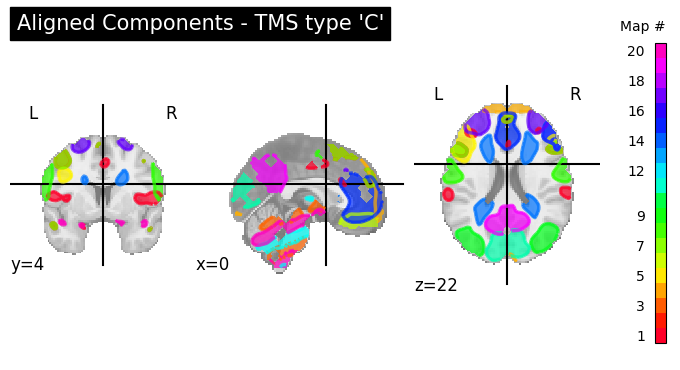

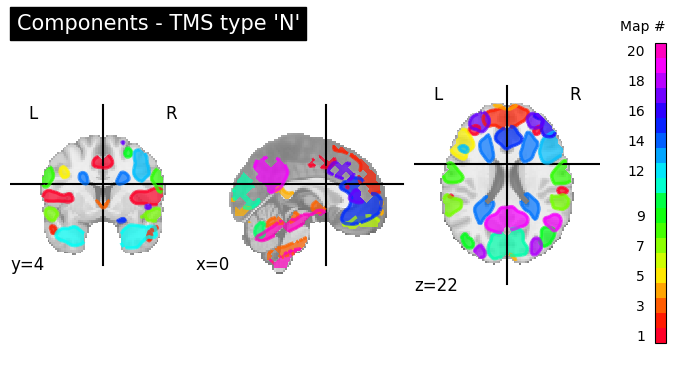

In [24]:
display_S = plot_prob_atlas(components_S_4D, colorbar=True, 
                title="Aligned Components - TMS type 'S'")
display_C = plot_prob_atlas(components_C_4D, colorbar=True, 
                title="Aligned Components - TMS type 'C'")
display_C = plot_prob_atlas(components_N_4D, colorbar=True, 
                title="Components - TMS type 'N'")
plt.show()

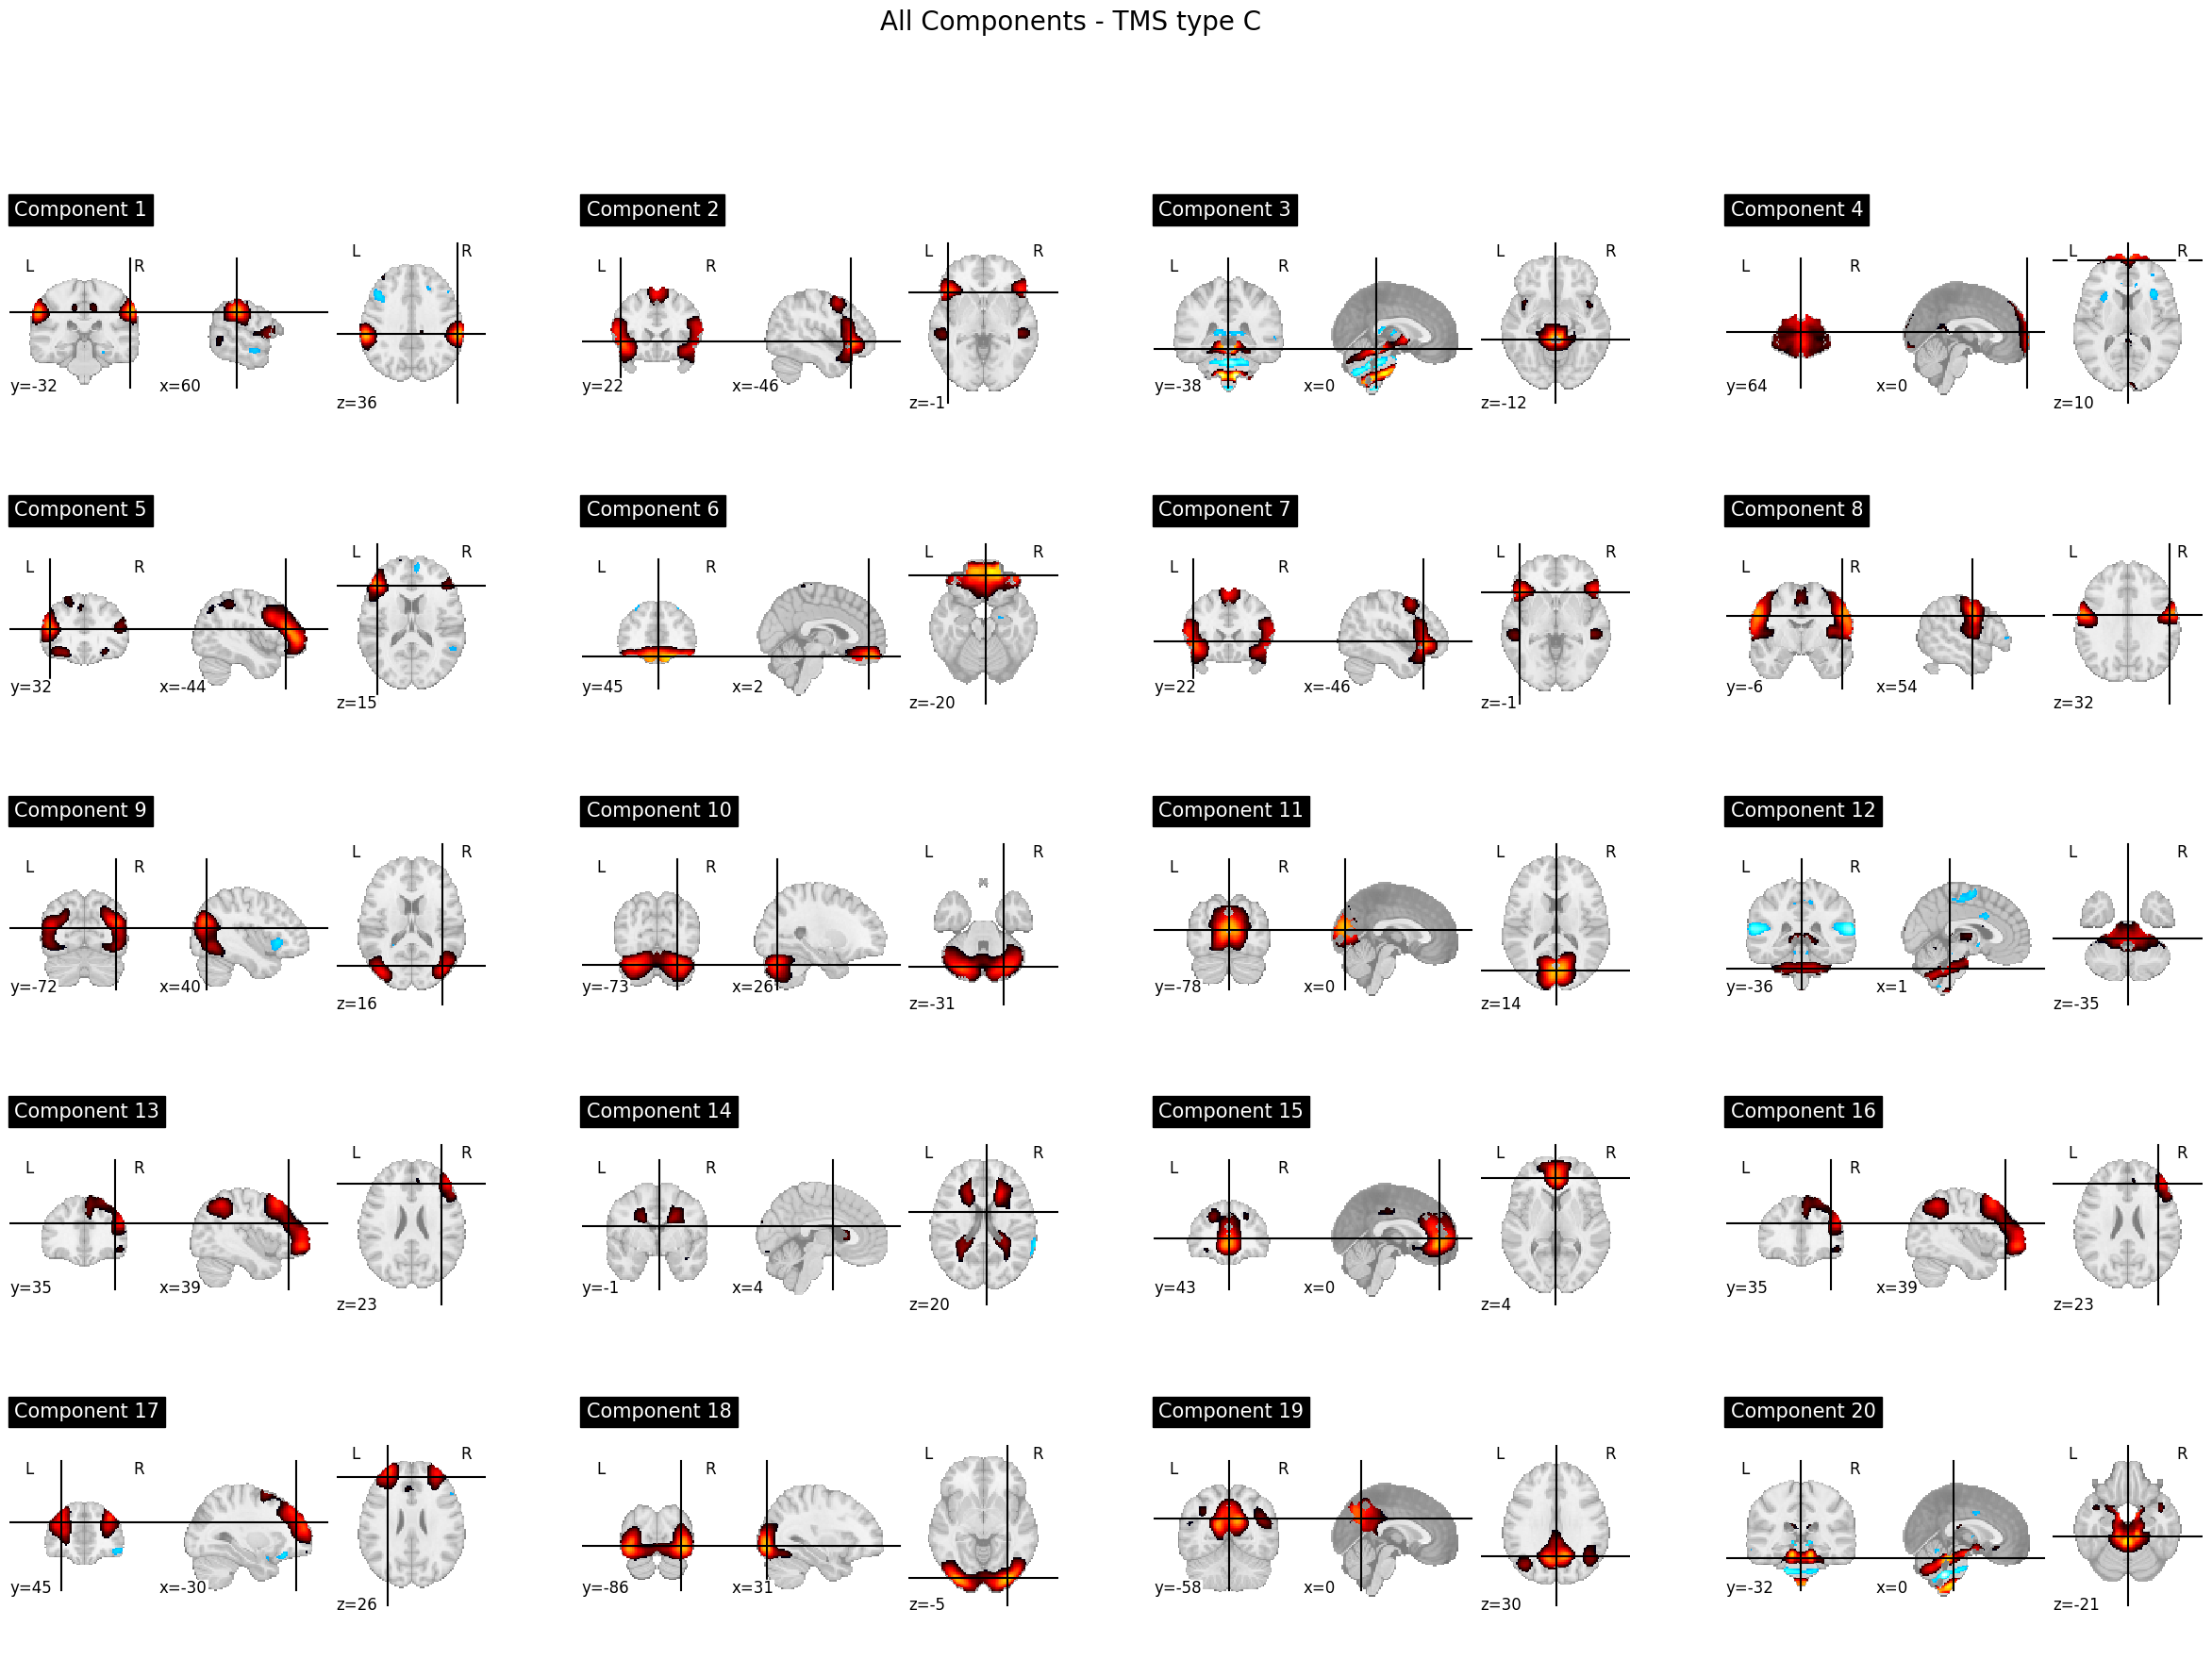

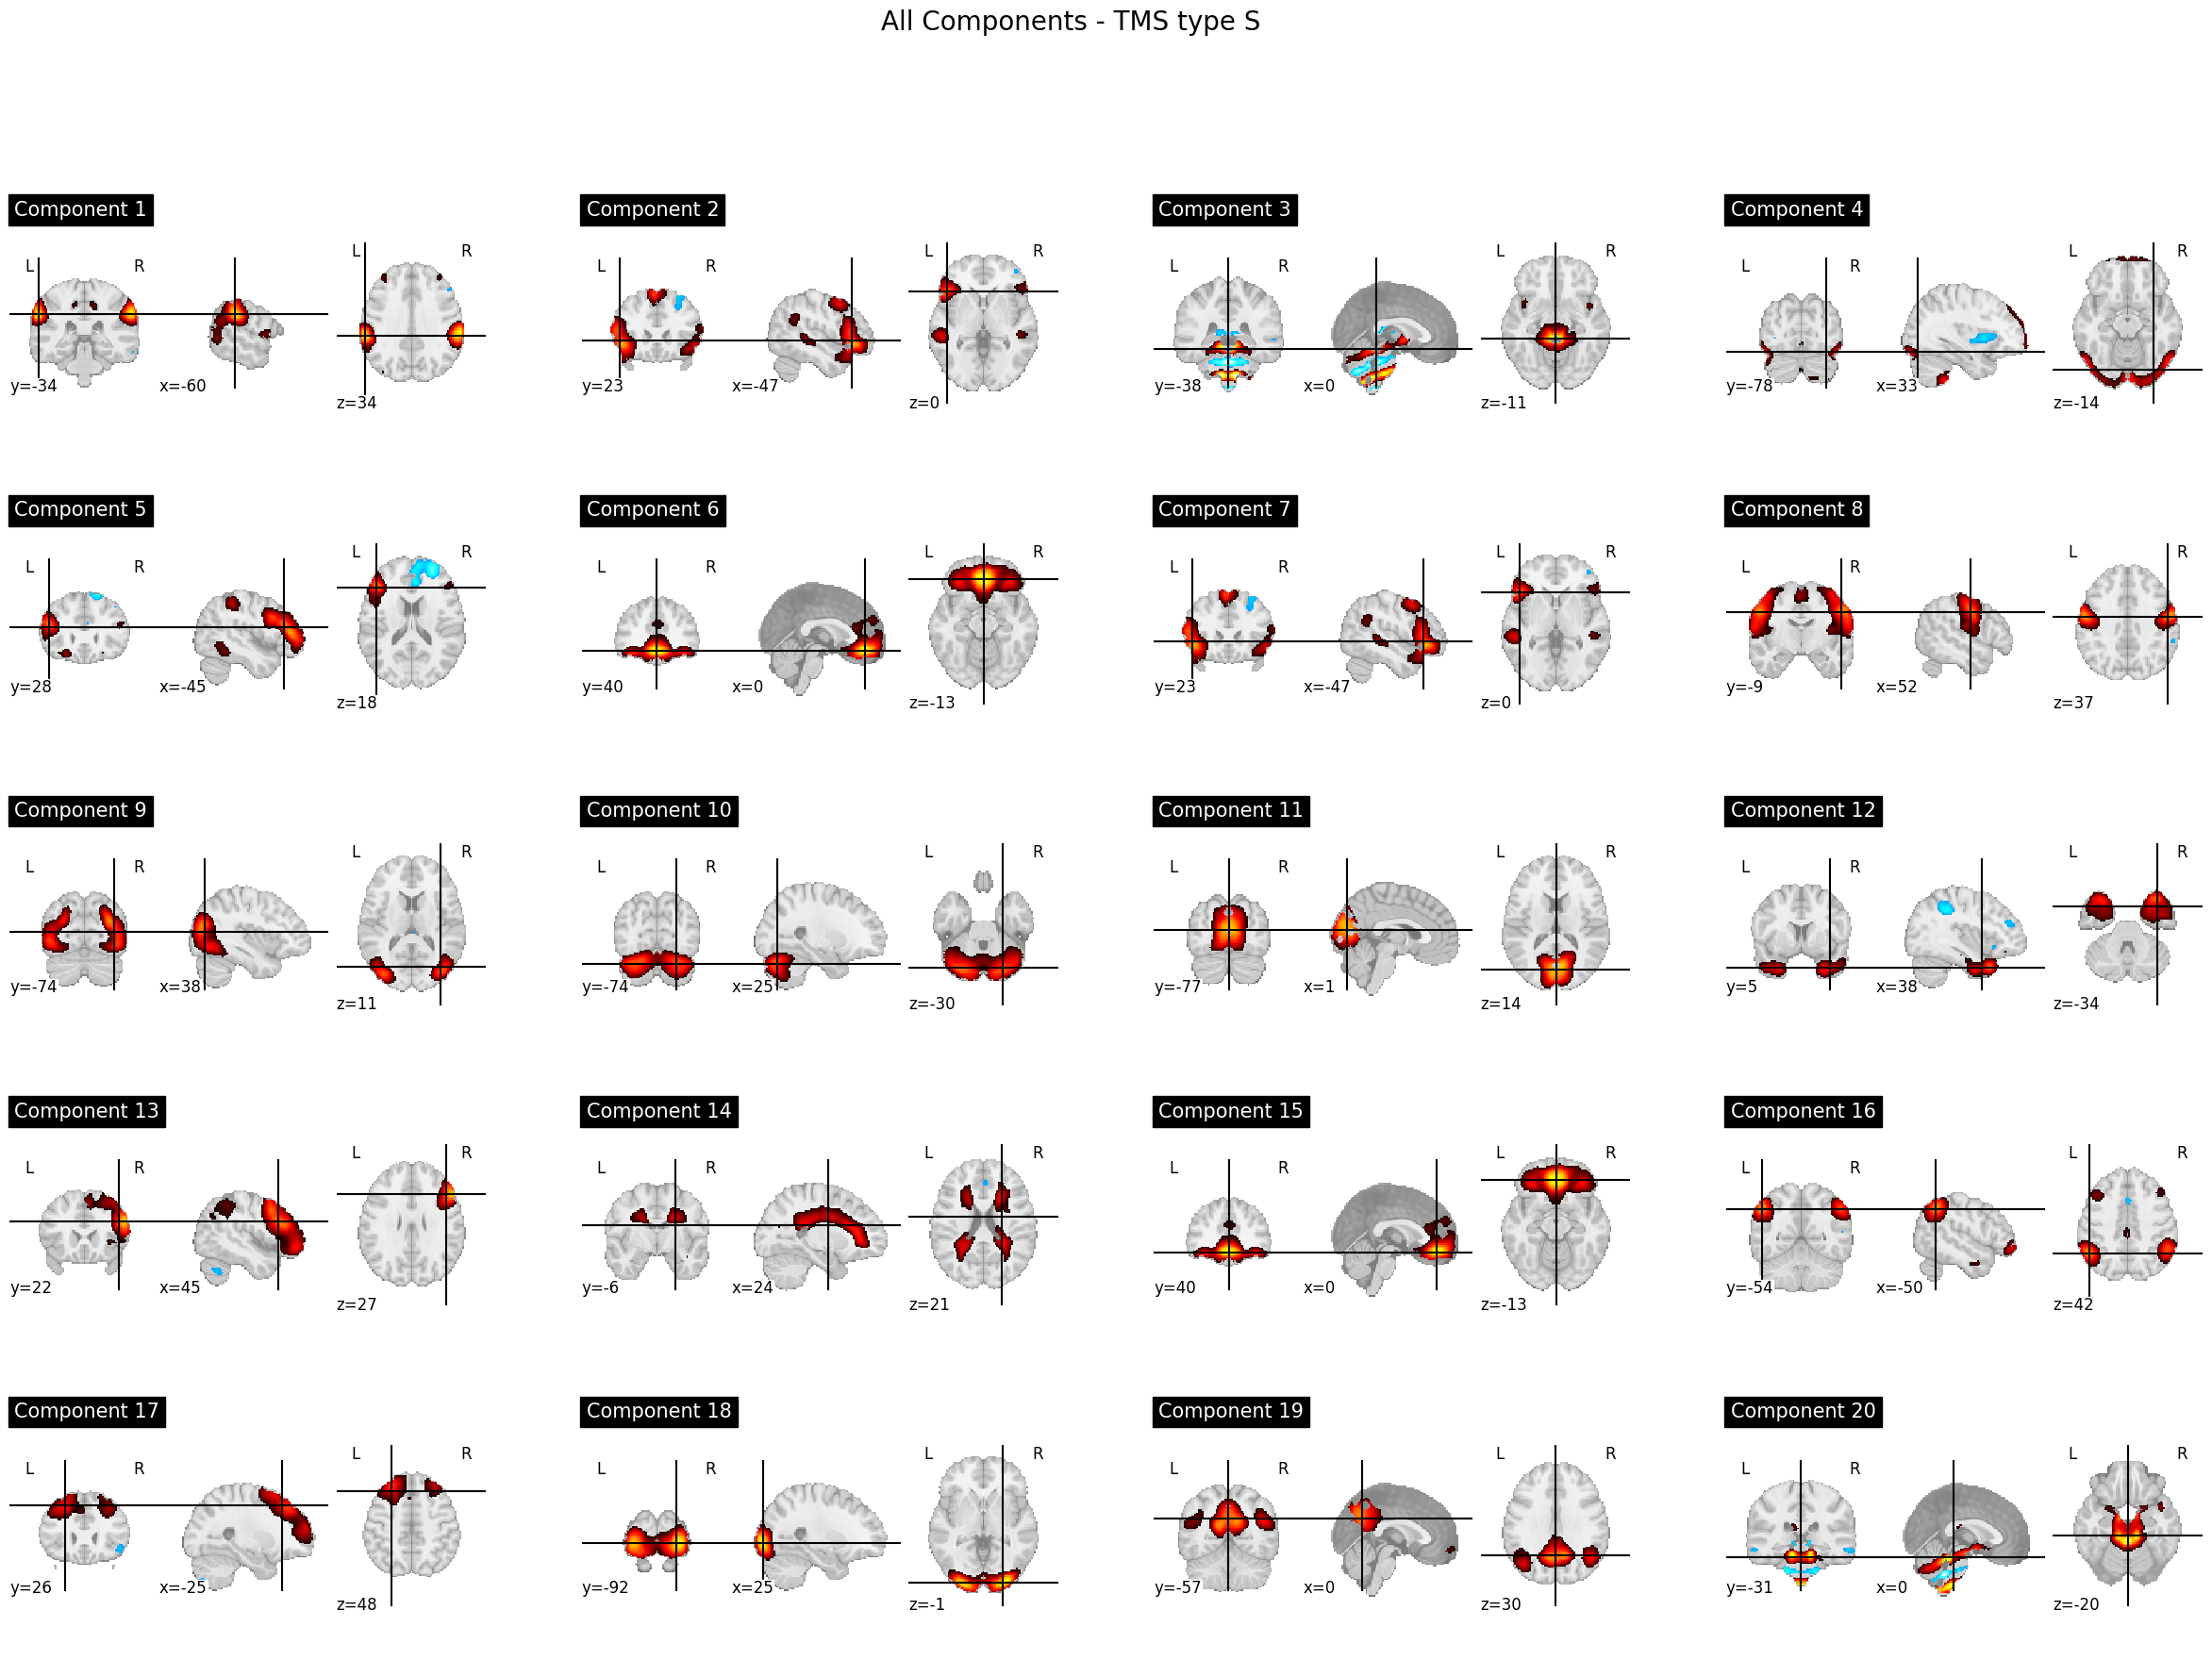

In [18]:
# plot each component separately
for tms_type in ['C', 'S']:
    nifti_file = output_dir / f"aligned_components_{tms_type}_with_N_4D.nii"
    canica_components_img = nib.load(nifti_file)
    canica_data = canica_components_img.get_fdata()
    
    n_components = canica_data.shape[-1]  # Number of components
    global_vmin = np.min(canica_data)
    global_vmax = np.max(canica_data)

    fig, axes = plt.subplots(5, 4, figsize=(30, 20)) 
    axes = axes.flatten()
    for i in range(n_components):
        # Extract the i-th component as a new NIfTI image
        component_img = nib.Nifti1Image(canica_data[..., i], 
                                        affine=canica_components_img.affine)
        
        # Plot the component in the i-th subplot (using axes[i])
        plot_stat_map(component_img, title=f"Component {i + 1}", 
                      vmin=global_vmin, vmax=global_vmax, 
                      axes=axes[i], colorbar=False)

    fig.suptitle(f"All Components - TMS type {tms_type}", fontsize=20)
    fig.savefig(output_dir / f"all_components_TMS_{tms_type}.png")
    plt.show()
    plt.close(fig)